상관분석 & 히트맵
  - 생존자와 관련된 변수의 상관관계 찾아보기
  - 생존과 가장 상관도가 높은 변수는
  - 피어슨 상관계수를이용한 상관분석
  - 시각화 : 히드맵이나 산점도
  - 0.0 ~ 0.2: 상관관계가 거의 없음
  - 0.2 ~ 0.4 : 약한 상관관계
  - 0.4 ~ 0.6 : 상관관계가 있음
  - 0.6 ~ 0.8 : 강한 상관관계
  - 0.8 ~ 1.0 : 매우강한 상관관계



In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 실행히 발생되는 경고문구를 출력하지 않는다
# import warnings
# warnings.filterwarnings('ignore')

In [2]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


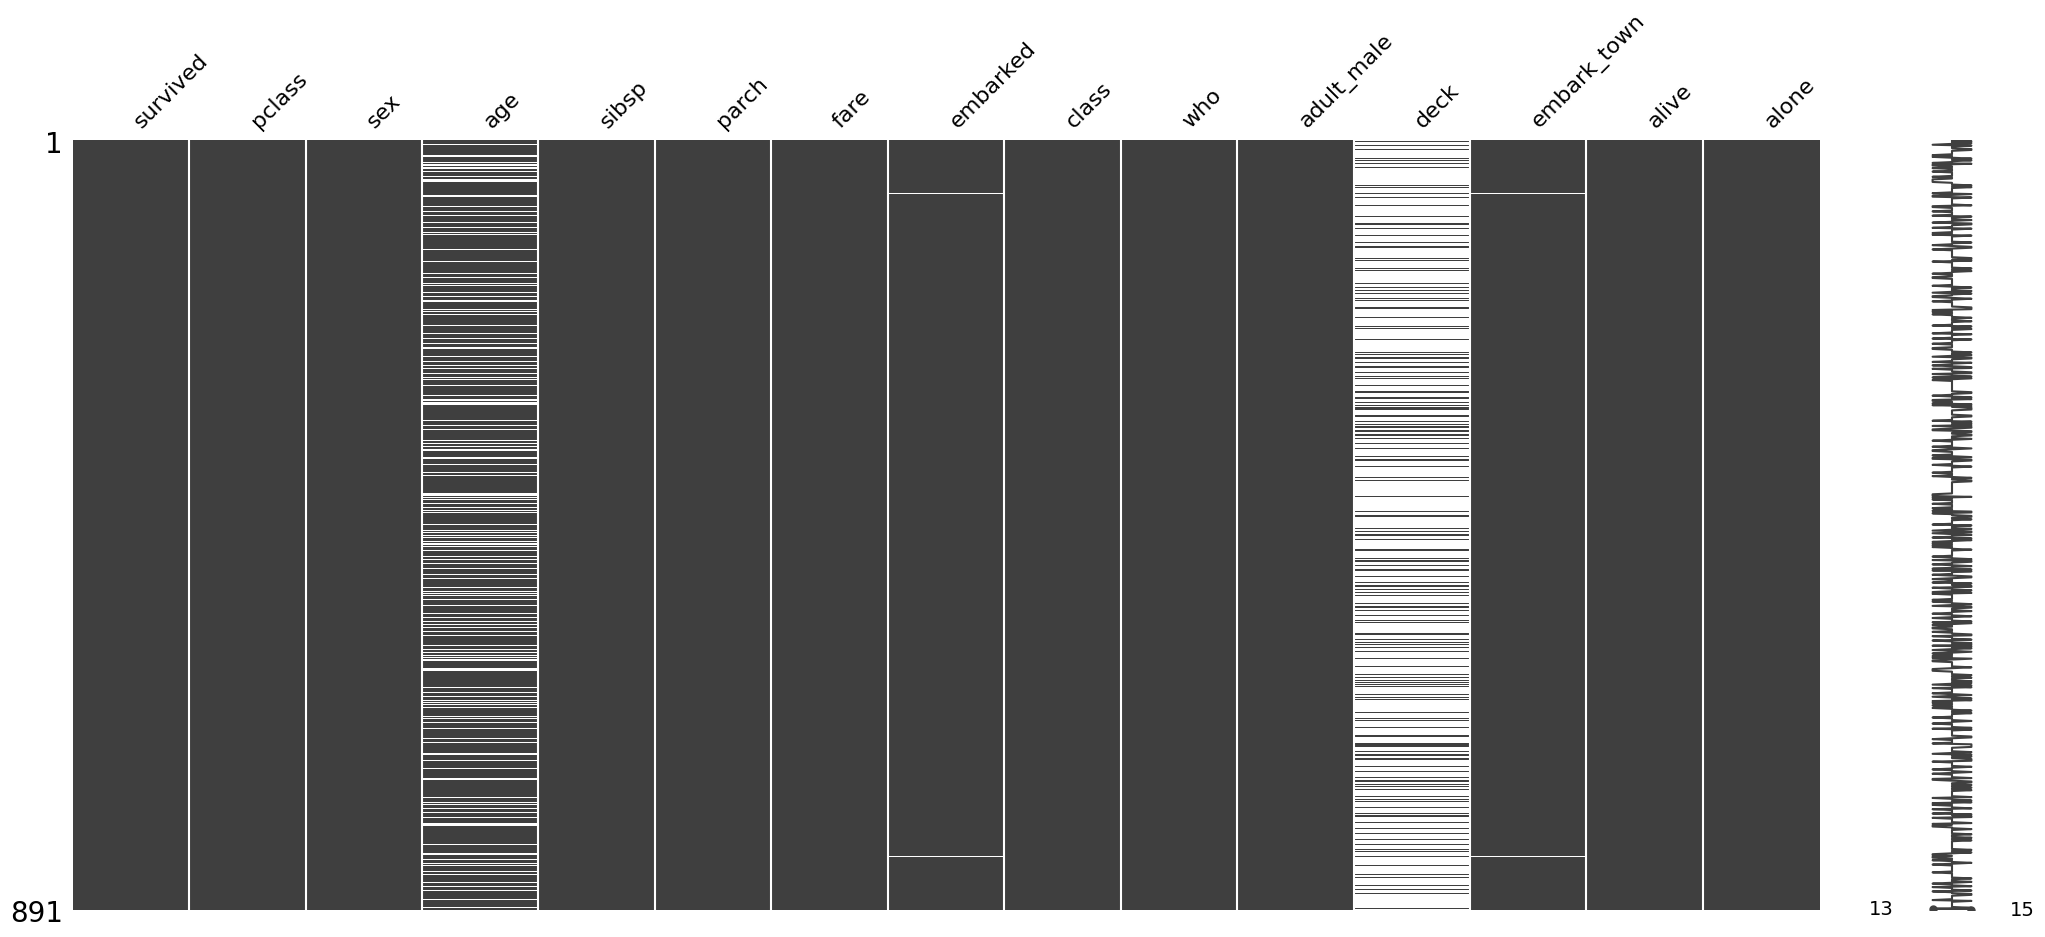

In [5]:
# 결측치 시각화
import missingno as msno
msno.matrix(titanic)
plt.show()

In [6]:
# 결측치 채움
# 수치형 데이터는 평균으로 채운다.
titanic['age'].fillna(titanic['age'].mean(), inplace=True)

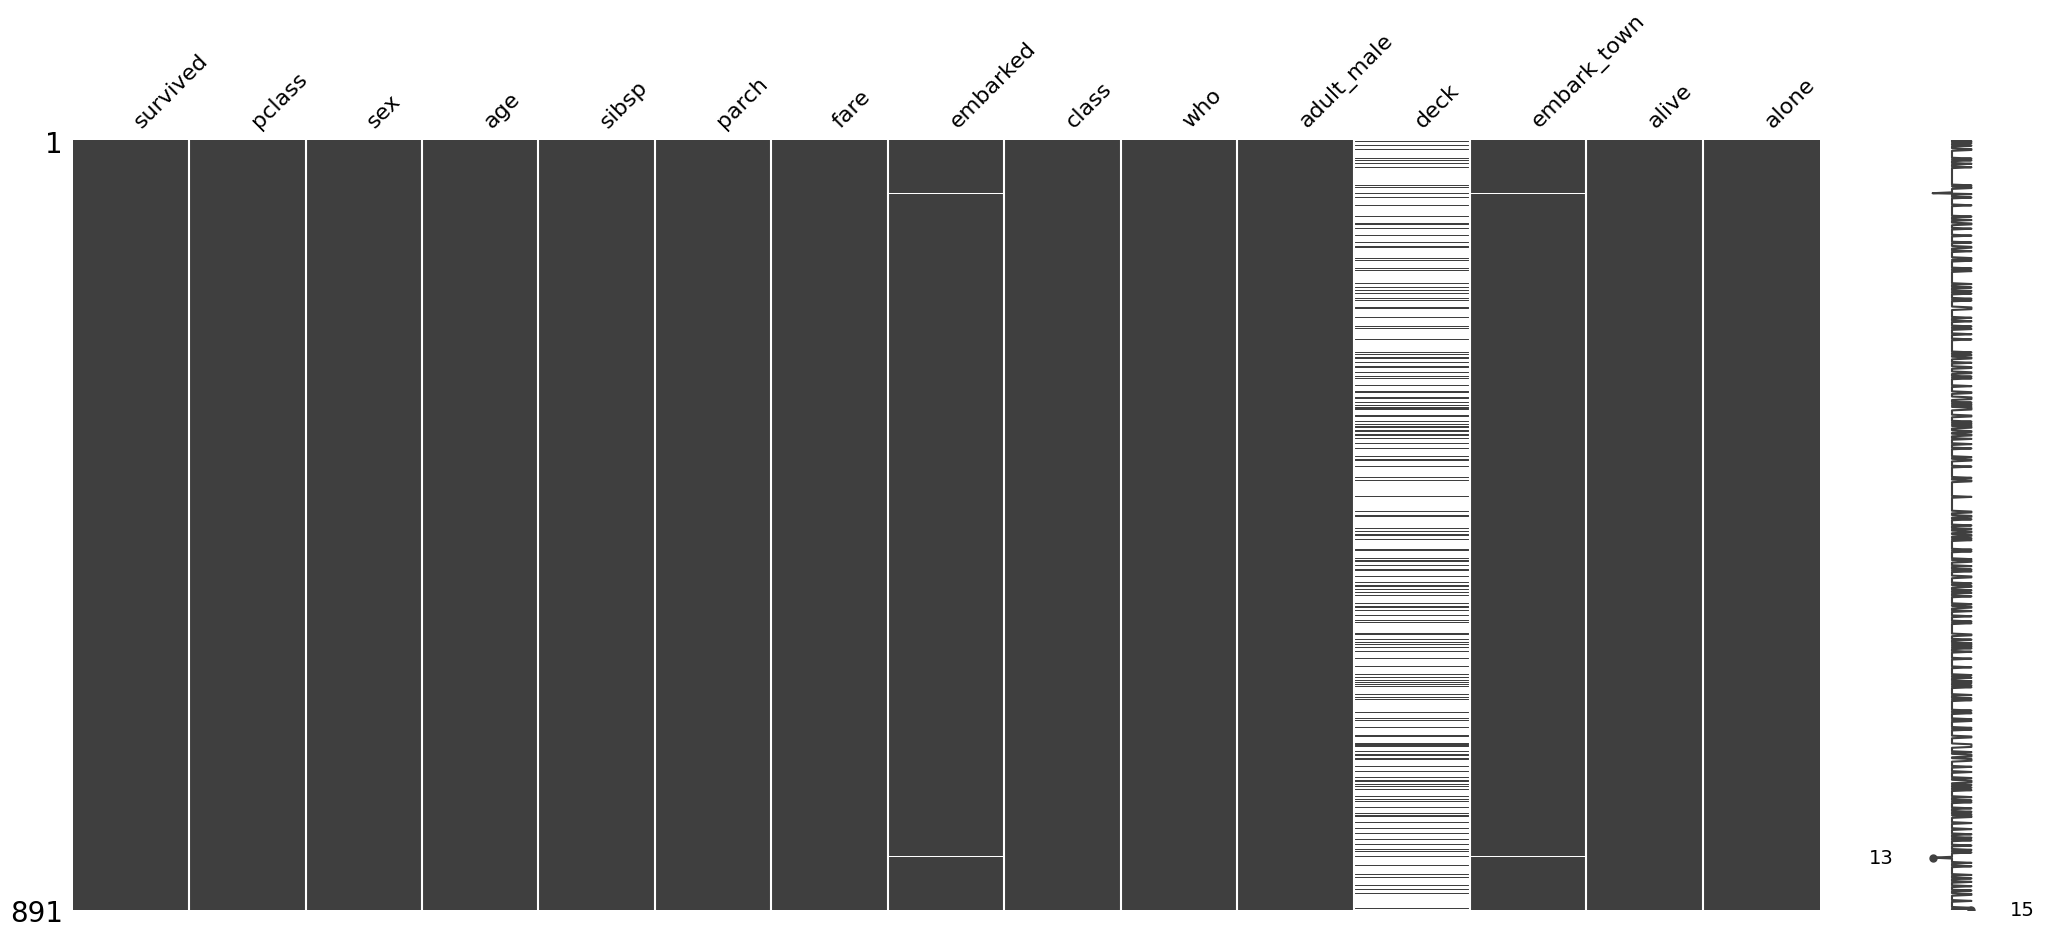

In [7]:
msno.matrix(titanic)
plt.show()

In [11]:
titanic['embarked'] = titanic['embarked'].str.lower()

In [12]:
titanic['embarked'].value_counts()

,count
embarked,
s,644
c,168
q,77


In [13]:
# 범주형 데이터는 빈도수가 가장 많은 데이터로 결측치를 채운다
titanic['embarked'].fillna('s', inplace=True)

In [20]:
titanic['embark_town'].fillna('Southampton',inplace=True)

In [31]:
most_preque = titanic['deck'].value_counts().index[0]

titanic['deck'].fillna(most_preque,inplace=True)

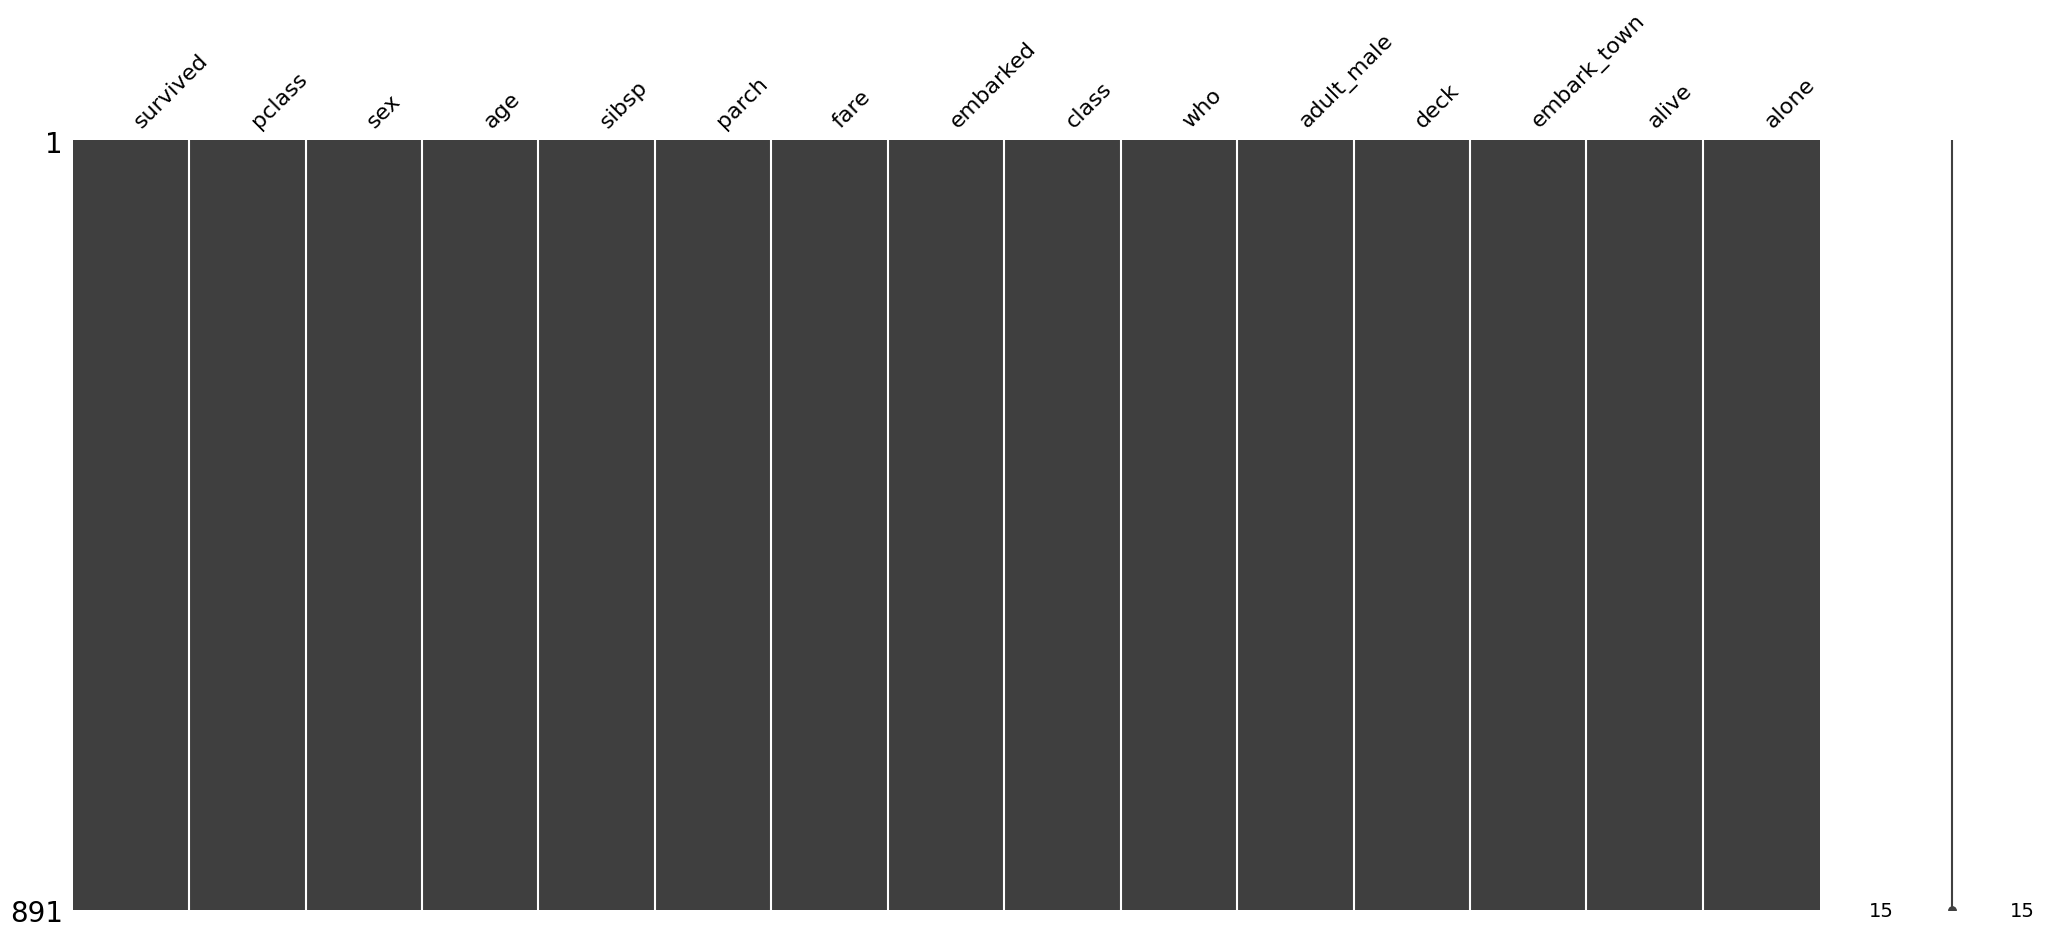

In [32]:
msno.matrix(titanic)
plt.show()

In [34]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [35]:
titanic.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,s,Third,man,True,C,Southampton,no,False


# 시각적 탐색
  - 생존율
    - 남자승객의 생존율
    - 여자승객의 생존율

In [45]:
male_survived =  titanic[titanic['sex'] == 'male']['survived'].value_counts()

In [57]:
female_survived =  titanic.groupby('sex')['survived'].value_counts()['female']

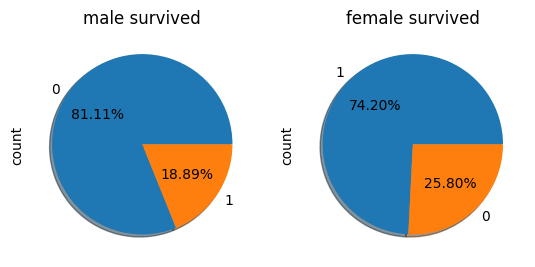

In [62]:
colors = ['blue','orange']

plt.subplot(1,2,1)
male_survived.plot.pie(autopct='%1.2f%%', shadow = True )
plt.title('male survived')

plt.subplot(1,2,2)
female_survived.plot.pie(autopct='%1.2f%%', shadow = True)
plt.title('female survived')
plt.show()

# 객실별 생존자 수

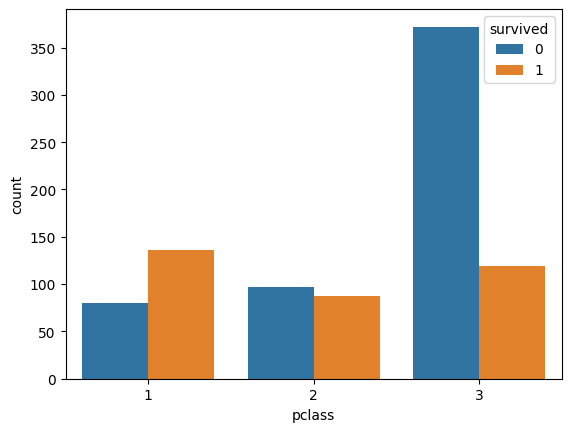

In [63]:
sns.countplot(x='pclass', hue='survived', data=titanic)
plt.show()

# 상관분석을 위한 상관계수 구하기
  - 수치형 데이터만 추출
  - 데이터 모양확인
  - 상관지수를 구하기

In [67]:
titanic2 = titanic.select_dtypes(include=['int','float','bool'])
print(titanic2.shape)
titanic_corr = titanic2.corr()
titanic_corr

(891, 8)


,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,0.253236,0.179775
sibsp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.253236,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.179775,-0.584471,-0.583398,-0.271832,0.404744,1.000000


# 특정변수 사이의 상관계수

In [69]:
titanic['survived'].corr(titanic['adult_male'])

-0.5570800422053257

In [70]:
titanic['survived'].corr(titanic['fare'])

0.2573065223849625

# 산점도로 상관분석 시각화

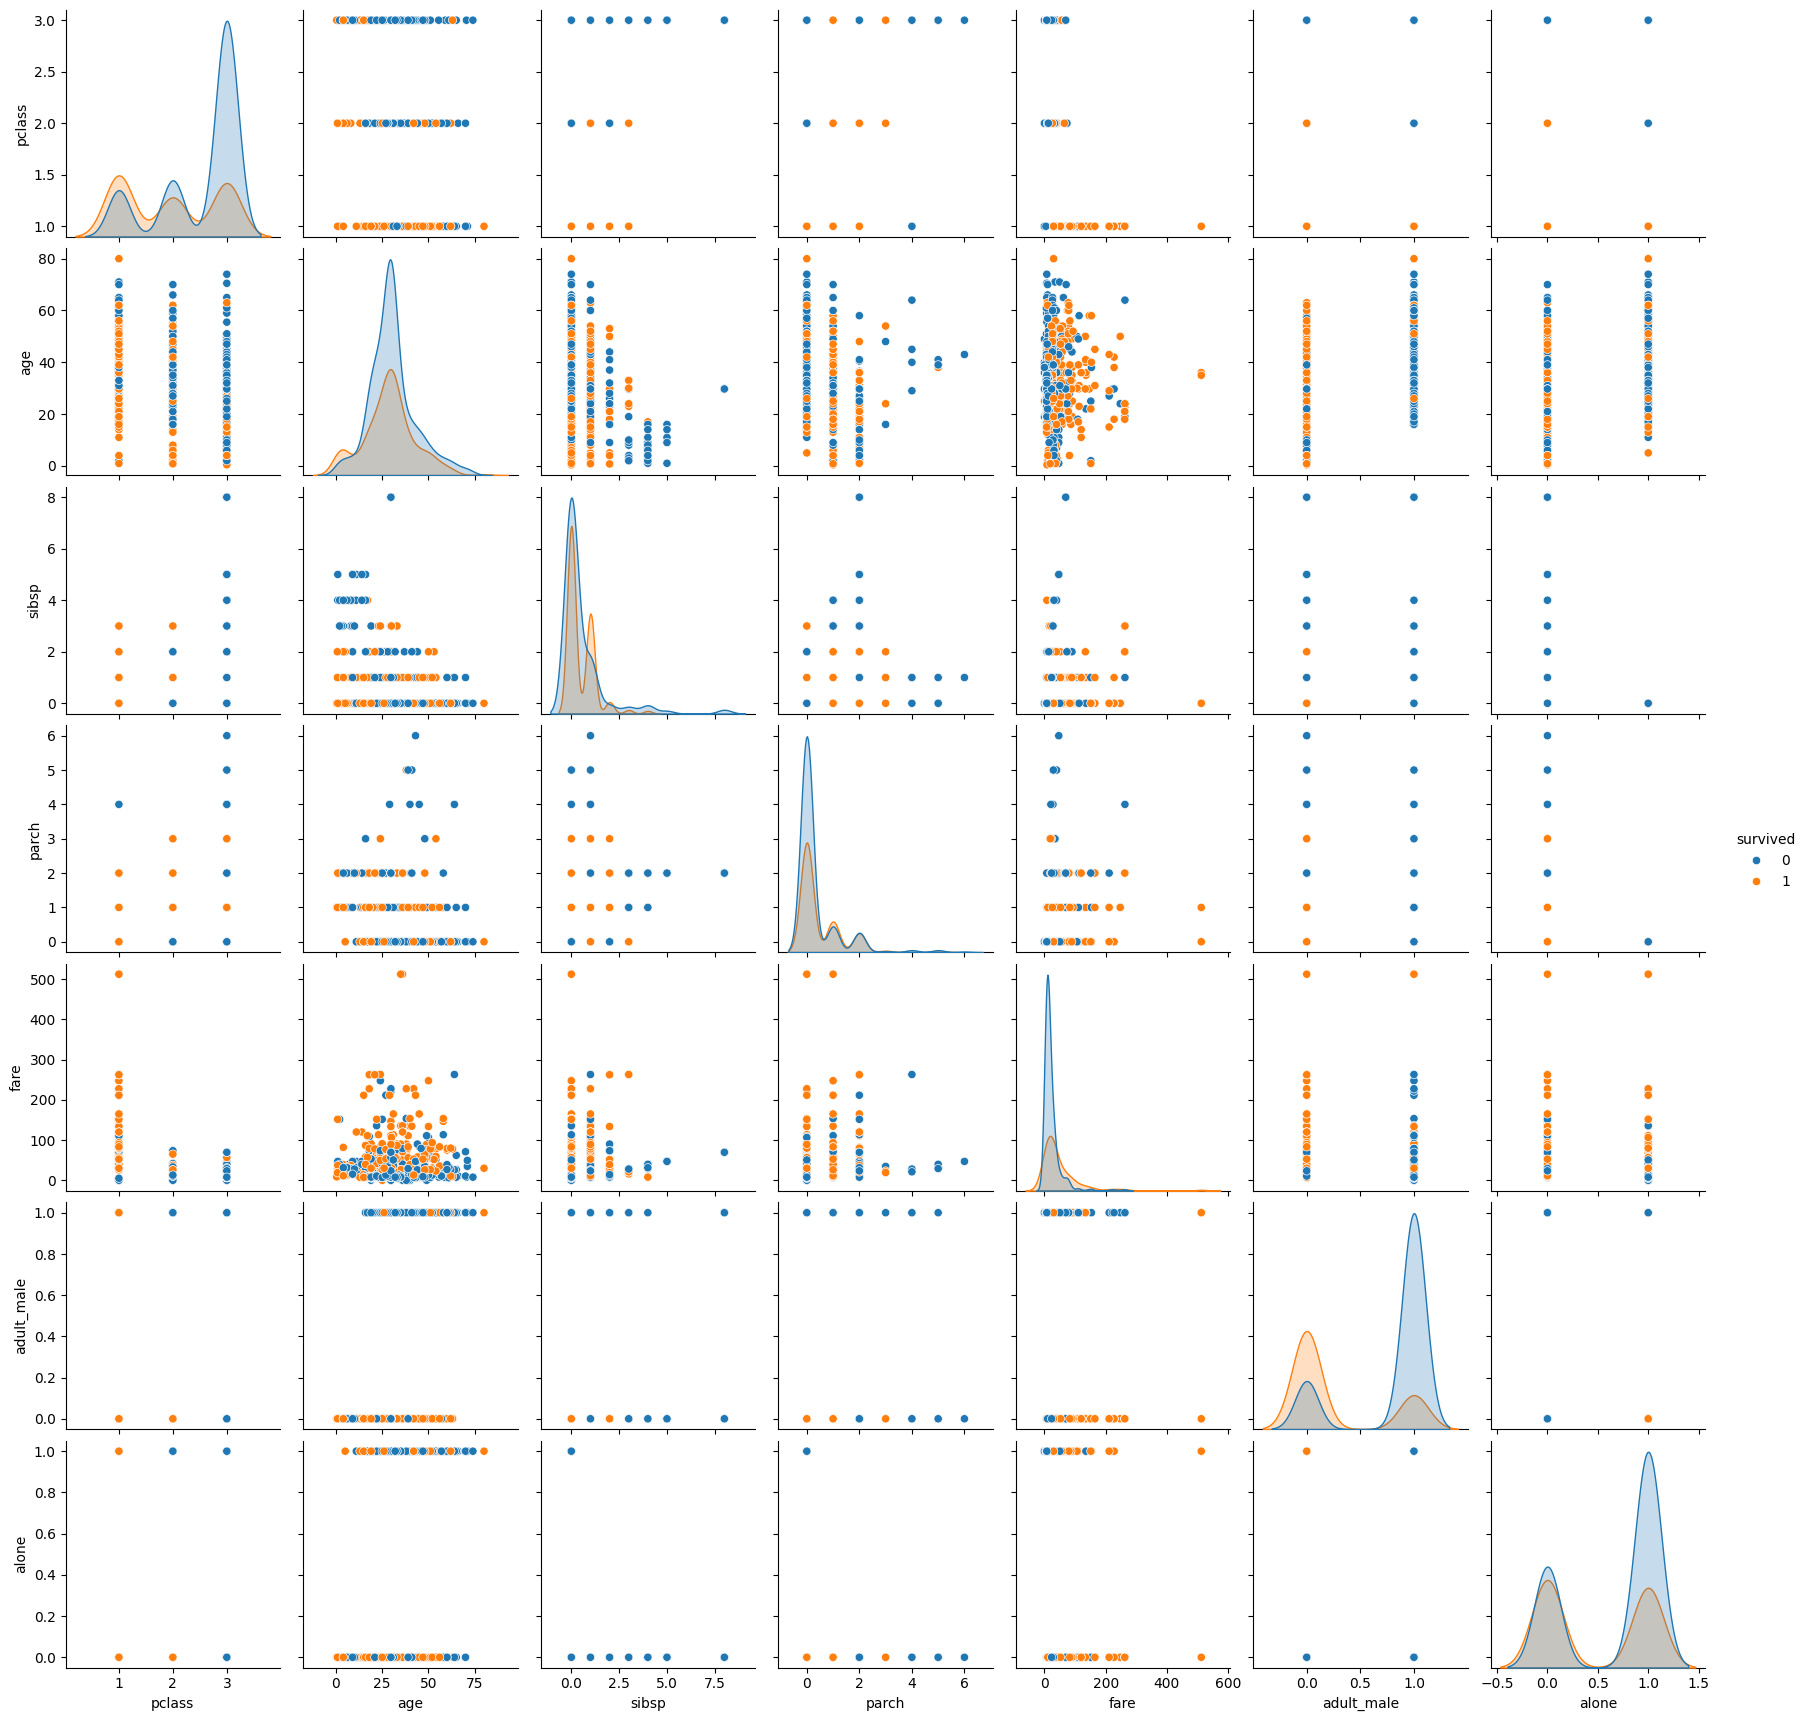

In [72]:
sns.pairplot(titanic, hue='survived')
plt.show()

# 연속형 데이터를 범주형 데이터로 분류
  - 10살보다 작으면 0

In [73]:
def category_age(age):
  if age < 10:
    return 0
  elif age < 20:
    return 1
  elif age < 30:
    return 2
  elif age < 40:
    return 3
  elif age < 50:
    return 4
  elif age < 60:
    return 5
  elif age < 70:
    return 6
  else:
    return 7
titanic['age_category'] = titanic['age'].apply(category_age)

In [75]:
# 남자 1 여자 0   문자형 카테고리 데이터를 수치형
titanic['sex_category'] = titanic['sex'].apply(lambda x: 1 if x == 'male' else 0)

# 타이타닉 데이터의 고유한 특성( 데이터에 대한 도메인지식이 중요)
# sibsp  동행한 형재매 및 배우자 수
# parch 동반한 부모 및 자녀의수
titanic['family'] = titanic['sibsp'] + titanic['parch'] + 1   # 가족수  +1 은 자기자신

In [82]:
titanic.select_dtypes(include='number').corr()

,survived,pclass,age,sibsp,parch,fare,age_category,sex_category,family
survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,-0.052184,-0.543351,0.016639
pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,-0.339368,0.131900,0.065997
age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,0.968603,0.084153,-0.248512
sibsp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.227286,-0.114631,0.890712
parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,-0.158476,-0.245489,0.783111
fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,0.100123,-0.182333,0.217138
age_category,-0.052184,-0.339368,0.968603,-0.227286,-0.158476,0.100123,1.000000,0.074415,-0.234514
sex_category,-0.543351,0.131900,0.084153,-0.114631,-0.245489,-0.182333,0.074415,1.000000,-0.200988
family,0.016639,0.065997,-0.248512,0.890712,0.783111,0.217138,-0.234514,-0.200988,1.000000


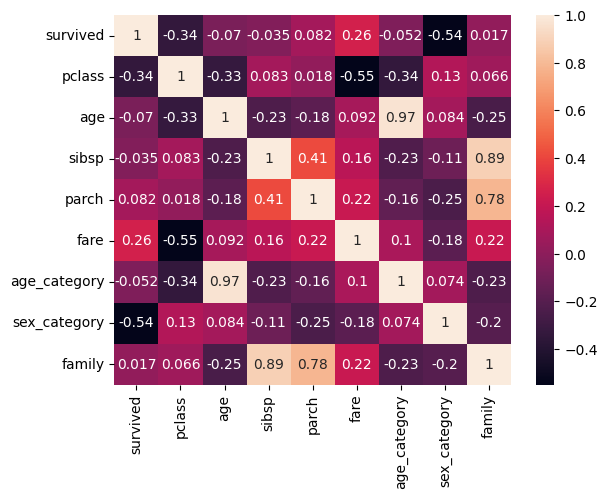

In [83]:
sns.heatmap(titanic.select_dtypes(include='number').corr(), annot=True)
plt.show()

# 지리정보 분석(지오맵)
  - https://github.com/leeky20240624/pythone/blob/main/2%EA%B0%9C%EC%9B%94/3%EC%A3%BC%EC%B0%A8/CoffeeBean.csv

In [93]:
import pandas as pd
cb = pd.read_csv('CoffeeBean.csv', encoding='cp949',index_col=0,header= 0,engine='python')
cb.head()

,store,address,phone
0,차병원점,서울시 강남구 논현로 566 강남차병원1층,02-538-7615
1,강남대로점,서울시 서초구 강남대로 369 1층,02-588-5778
2,청담에스점,"서울시 강남구 압구정로 461 네이처포엠빌딩B108,109호",02-548-6052
3,신사점,서울시 강남구 도산대로 126,02-548-2741
4,역삼점,"서울시 강남구 논현로 512 지상1,2층",02-569-8051


# 행정구역 주소체계에 맞게 데이터를 정리
  - https://kosis.kr/search/search.do

In [121]:
import numpy as np
address = cb['address'].str.split().values.tolist()

In [131]:
# 서울특별시, 부산광역시, 인천광역시, 광주광역시,
df =  pd.DataFrame(address)
df[0].unique()


array(['서울시', '서울', '서울특별시', '부산광역시', '대전시', '경기도', '경남', '충북', '경기',
       '인천광역시', '부산시', '강원도', '인천', '경상남도', '부산', '인천시', '광주', '광주광역시',
       '대구광역시', '충남', '제주도'], dtype=object)

In [155]:
def change_city(city):
  if city == '서울시' or city == '서울':
    return '서울특별시'
  elif city == '경남':
    return '경상남도'
  elif city == '충북':
    return '충청북도'
  elif city == '충남':
    return '충청남도'
  elif city == '제주도':
    return '제주특별자치도'
  elif city == '경기':
    return '경기도'
  elif city == '강원':
    return '강원특별자치도'
  elif city == '부산시' or city == '부산':
    return '부산광역시'
  elif city == '대전시':
    return '대전광역시'
  elif city == '광주시':
    return '광주광역시'
  elif city == '대구시':
    return '대구광역시'
  elif city == '울산시':
    return '울산광역시'
  elif city == '세종시':
    return '세종특별자치시'
  elif city == '인천시':
    return '인천광역시'
  elif city == '광주':
    return '광주광역시'
  else:
    return city



In [165]:
addr = []
for address in cb['address']:
  temp = np.array(address.split()  )
  temp[0] = change_city(temp[0])
  addr.append(' '.join(temp) )

cb['address']  = addr

cb.head()





,store,address,phone
0,차병원점,서울특별시 강남구 논현로 566 강남차병원1층,02-538-7615
1,강남대로점,서울특별 서초구 강남대로 369 1층,02-588-5778
2,청담에스점,"서울특별시 강남구 압구정로 461 네이처포엠빌딩B108,109호",02-548-6052
3,신사점,서울특별 강남구 도산대로 126,02-548-2741
4,역삼점,"서울특별시 강남구 논현로 512 지상1,2층",02-569-8051


In [171]:
a = ['동해','물과','백두산']
' '.join(a)  # 리스트를 합치는 명령어 주로 리스트에 있는 문자열을 하나의 문장으로 생성할때 사용

'동해 물과 백두산'

# 지도 객체 생성

In [166]:
!pip install folium
import folium

In [173]:
mymap = folium.Map(location=[37.5759,126.9768], zoom_start=15)
mymap.save('mymap.html')

In [174]:
folium.Marker(
    location=[37.5759,126.9768],
    popup='경복궁',
    icon=folium.Icon(icon='cloud')
).add_to(mymap)

In [175]:
mymap

# 카카오 api  map 기능을 이용해서 우리가 주소를 전달하면 위경도로 반환받아서 해당위치를 지도에 표기

# 지오서비스 웹을 이용